
# **ECAPA-based Speaker Verification of Virtual Assistants**
## A Transfer Learning Approach

In [1]:
import torch
import time
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from singleton_decorator import singleton
from sklearn.metrics import confusion_matrix
from speechbrain.inference import SpeakerRecognition

## **I. Text-Independent Speaker Verification**



In [2]:
@singleton
class AS:
    def __init__(self):
        self.predictions, self.scores, self.time = [], [], []
        self.verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")
        self._warm_up()

    def _warm_up(self):
        self.verification.verify_files("./24.wav", "./22.wav")
    
    def verification_score(self, file_1, file_2):
        start_time = time.time()
        prediction, score = self.verification.verify_files(file_1, file_2)
        end_time = time.time()
        self.time.append(end_time-start_time)
        self._metrics(prediction, score)
        return prediction, score

    def _metrics(self, prediction, score):
        tensor_value = torch.tensor(prediction)
        bool_value=tensor_value.item()
        self.predictions.append(bool_value)
        self.scores.append(score.item())

    def refresh(self):
        self.predictions = []
        self.scores = []

#### **Confusion Matrix I**

In [3]:
def Confusion_Matrix(originalResult, predict):
    def acc(cm):
        TN1=cm[0][0]
        FP1=cm[0][1]
        FN1=cm[1][0]
        TP1=cm[1][1]

        acc1= (TP1+TN1)/(TP1+TN1+FN1+FP1)
        print("Accuracy:", acc1) 
    
    def precision(cm):
        FP1=cm[0][1]
        TP1=cm[1][1]

        precision1=(TP1)/(TP1+FP1)
        print("Precision:", precision1)
        return precision1

    def recall(cm):
        FN1=cm[1][0]
        TP1=cm[1][1]

        recall1=(TP1)/(TP1+FN1)
        print("Recall:", recall1)
        return recall1

    def f_score(precision1, recall1):
        f1_score1=(2*precision1*recall1)/(precision1+recall1)
        print("F1 Score:", f1_score1)

    cm = confusion_matrix(originalResult, predict)

    acc(cm)
    f_score(recall(cm), precision(cm))

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('\nConfusion Matrix for Speaker Verification\n')
    plt.show()

#### **Evaluation**

In [4]:
original_prediction = []
speaker_verification = AS()

/home/tnc/anaconda3/envs/Speaker_Verification/lib/python3.10/site-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)
/home/tnc/anaconda3/envs/Speaker_Verification/lib/python3.10/site-packages/speechbrain/utils/checkpoints.py:194: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mo

In [5]:
def process_file(filename, speaker_verification, original_prediction):

    with open(filename, 'r') as f:
        lines = f.readlines()
        
    for line in tqdm(lines, desc=f'Processing {filename}', unit='line'):
        parts = line[:-1].split(' ')
        p1, p2, dec = parts
        original_prediction.append(True if dec == 'True' else False)
        speaker_verification.verification_score(p1, p2)

    return speaker_verification, original_prediction

In [6]:
speaker_verification, original_prediction = process_file('trial_true.txt', speaker_verification, original_prediction)
speaker_verification, original_prediction = process_file('trial_false.txt', speaker_verification, original_prediction)

Processing trial_true.txt:   0%|          | 0/25000 [00:00<?, ?line/s]/tmp/ipykernel_108017/3864784888.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_value = torch.tensor(prediction)
Processing trial_false.txt:  80%|███████▉  | 43738/55000 [14:11:12<3:36:39,  1.15s/line] 

Time taken for verification_score: 1.199465 seconds
Accuracy: 0.91745
Recall: 0.84352
Precision: 0.8867956265769554
F1 Score: 0.8646166461664617


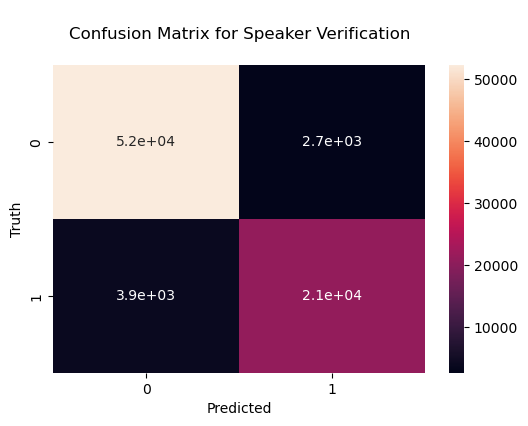

In [7]:
print(f'Time taken for verification_score: {np.mean(speaker_verification.time):.6f} seconds')
Confusion_Matrix(original_prediction, speaker_verification.scores)

In [10]:
speaker_verification.predictions

[0.49638739228248596,
 0.2030135840177536,
 0.430973619222641,
 0.49421370029449463,
 0.33181431889533997,
 0.2817738652229309,
 0.316914826631546,
 0.25209295749664307,
 0.371773898601532,
 0.18543389439582825,
 0.37576624751091003,
 0.48939236998558044,
 0.44755274057388306,
 0.26635441184043884,
 0.6965284943580627,
 0.4122259020805359,
 0.3581327497959137,
 0.5047751665115356,
 0.3888469934463501,
 0.1603182554244995,
 0.27396249771118164,
 0.4440542459487915,
 0.36360082030296326,
 0.30348581075668335,
 0.35760927200317383,
 -0.11397866904735565,
 0.07468900084495544,
 0.3398699462413788,
 0.483782559633255,
 0.46754372119903564,
 0.6066633462905884,
 0.2543118894100189,
 0.3771561086177826,
 0.410916268825531,
 0.14213235676288605,
 0.48652392625808716,
 0.20398490130901337,
 0.4165956377983093,
 0.30680355429649353,
 0.21545498073101044,
 0.4296005368232727,
 0.5100311040878296,
 0.4497889280319214,
 0.5296765565872192,
 0.3842657208442688,
 0.4618583917617798,
 0.54698872566223